# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Sabtu, 13 Juli 2024
3. Tempat di Kost
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [1]:
# pip install tensorflow

In [2]:
# pip install keras

In [3]:
# pip install opencv-python

In [4]:
# pip install imutils

In [5]:
# pip install matplotlib

In [6]:
# pip install seaborn

In [7]:
# pip install scikit-learn

# Import Library

In [8]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [9]:
import os
import pandas as pd
import cv2

def convert_to_png(image_path, output_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # Create the output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    # Save the image as PNG
    cv2.imwrite(output_path, image)

def get_last_n_parts(path, n):
    return os.path.join(*path.split(os.sep)[-n:])

def create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR):
    # List to store image file paths and their corresponding labels and dimensions
    data = []

    # Traverse the dataset directory
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                # Get the class label from the subdirectory name
                label = os.path.basename(root)
                # Get the full file path
                file_path = os.path.join(root, file)
                
                # Create a new file path for the PNG image
                relative_path = os.path.relpath(file_path, DATASET_PATH)
                png_file_path = os.path.join(OUTPUT_IMAGE_DIR, os.path.splitext(relative_path)[0] + '.png')
                
                # Convert the image to PNG
                convert_to_png(file_path, png_file_path)
                
                # Get image dimensions
                img = cv2.imread(file_path)
                height, width, _ = img.shape
                
                # Get only the last 3 parts of the path for CSV
                csv_path = get_last_n_parts(png_file_path, 2)
                
                # Append to the data list including dimensions
                data.append([csv_path, width, height, label])
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['file_path', 'width', 'height', 'label'])
    
    # Save the DataFrame to a CSV file
    df.to_csv(OUTPUT_CSV, index=False)
    print(f'Labels CSV file created at: {OUTPUT_CSV}')

# Define the paths for the two datasets and their respective output directories
DATASET_1 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\CustomData\\v.5 - Data Custom\\Test Data\\"
OUTPUT_CSV_1 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\labels_1.csv"
OUTPUT_IMAGE_DIR_1 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\"

DATASET_2 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\CustomData\\v.5 - Data Custom\\Train and Val\\"
OUTPUT_CSV_2 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\labels_2.csv"
OUTPUT_IMAGE_DIR_2 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\"

# Process the first dataset
create_labels_csv(DATASET_1, OUTPUT_CSV_1, OUTPUT_IMAGE_DIR_1)

# Process the second dataset
create_labels_csv(DATASET_2, OUTPUT_CSV_2, OUTPUT_IMAGE_DIR_2)

Labels CSV file created at: C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.2_val_data\labels_1.csv
Labels CSV file created at: C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.3\labels_2.csv


In [10]:
import pandas as pd

# Path ke dua file CSV yang berbeda
path_main1 = OUTPUT_IMAGE_DIR_1
file1 = path_main1 + "labels_1.csv"

path_main2 = OUTPUT_IMAGE_DIR_2
file2 = path_main2 + "labels_2.csv"

# Membaca kedua file CSV
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Menampilkan data dari kedua file
print("Data dari file pertama:")
print(df1.head())

print("\nData dari file kedua:")
print(df2.head())

Data dari file pertama:
                                     file_path  width  height label
0  ba\002798ad-631c-4f0c-b899-aa66fb5c2ac1.png    239     167    ba
1  ba\040ab1c7-bffa-4a93-8c42-54e5597f2243.png     96      67    ba
2  ba\0789a0d8-e129-48ec-b74e-2e53f4a7ece9.png    235     166    ba
3  ba\11f6c317-635a-4e64-8552-05bf8b7b3a95.png     96      67    ba
4  ba\13469389-6f9b-43dc-be99-8dfbfaae51cb.png    235     165    ba

Data dari file kedua:
                 file_path  width  height label
0     ba\ba116.pred3.b.png    224     224    ba
1       ba\ba116.pred3.png    224     224    ba
2   ba\ba116.pred3.r10.png    224     224    ba
3    ba\ba116.pred3.r5.png    224     224    ba
4  ba\ba116.pred3.rm10.png    224     224    ba


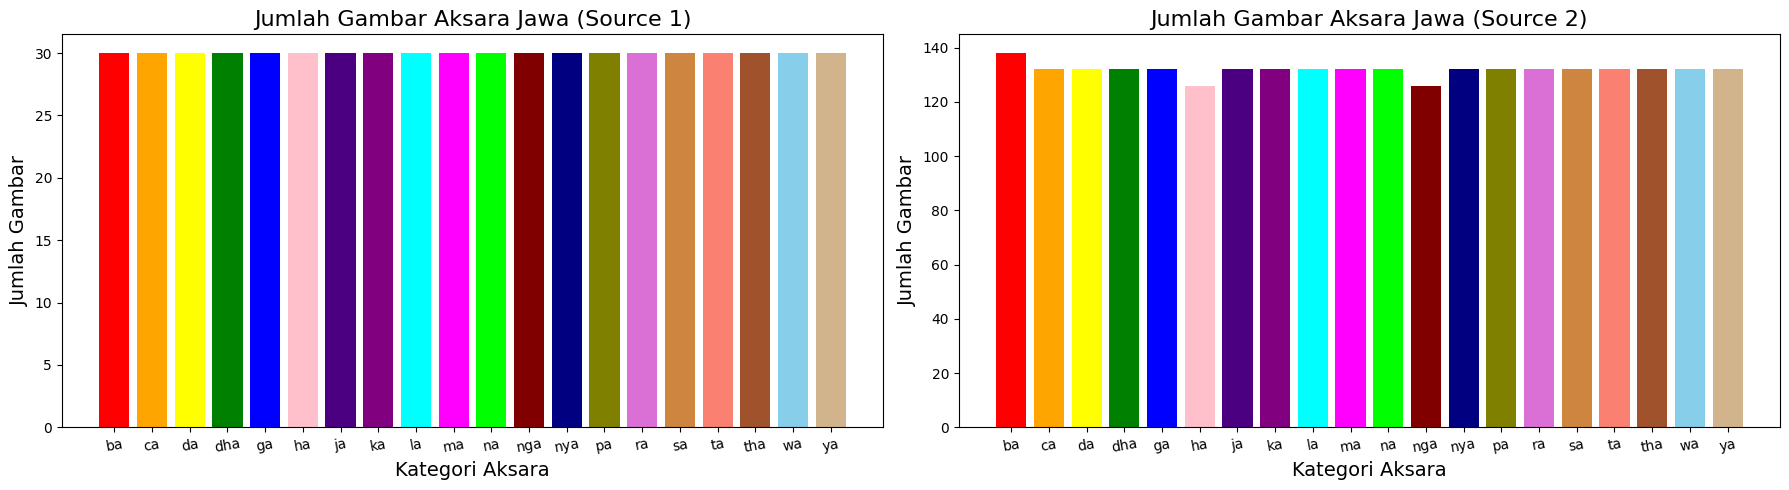

In [11]:
import matplotlib.pyplot as plt
import os

# Define function to count files in each directory
def count_files(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    return num_files

# Define paths for two sources
source_1_paths = [
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\ba",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\ca",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\da",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\dha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\ga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\ha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\ja",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\ka",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\la",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\ma",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\na",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\nga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\nya",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\pa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\ra",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\sa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\ta",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\tha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\wa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.2_val_data\\ya"
]

source_2_paths = [
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\ba",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\ca",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\da",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\dha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\ga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\ha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\ja",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\ka",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\la",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\ma",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\na",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\nga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\nya",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\pa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\ra",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\sa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\ta",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\tha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\wa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.3\\ya"
]

# Count files for each path
file_counts_1 = [count_files(path) for path in source_1_paths]
file_counts_2 = [count_files(path) for path in source_2_paths]

# Define categories and colors
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']

# Create bar charts
plt.figure(figsize=(18, 5))

# Plot for Source 1
plt.subplot(1, 2, 1)
plt.bar(aksara_categories, file_counts_1, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa (Source 1)', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Plot for Source 2
plt.subplot(1, 2, 2)
plt.bar(aksara_categories, file_counts_2, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa (Source 2)', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input paths and aksara categories for each source
INPUT_PATH_1 = path_main1
INPUT_PATH_2 = path_main2
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (32, 32)
INPUT_SHAPE = (32, 32, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index

def load_images(input_path_1, input_path_2, aksaraJowo, image_size):
    X_original_1, X_grayscale_1, X_filtered_1, y_label_1 = [], [], [], []
    X_original_2, X_grayscale_2, X_filtered_2, y_label_2 = [], [], [], []
    
    # Process images from the first source
    generator_1 = create_image_generator(input_path_1, aksaraJowo, image_size)
    for original_image, grayscale_image, image_filtered, label in generator_1:
        X_original_1.append(original_image)
        X_grayscale_1.append(grayscale_image)
        X_filtered_1.append(image_filtered)
        y_label_1.append(label)
        
    # Process images from the second source
    generator_2 = create_image_generator(input_path_2, aksaraJowo, image_size)
    for original_image, grayscale_image, image_filtered, label in generator_2:
        X_original_2.append(original_image)
        X_grayscale_2.append(grayscale_image)
        X_filtered_2.append(image_filtered)
        y_label_2.append(label)
        
    X_original_1 = np.array(X_original_1)
    X_grayscale_1 = np.array(X_grayscale_1)
    X_filtered_1 = np.array(X_filtered_1)
    y_label_1 = to_categorical(np.array(y_label_1))
    
    X_original_2 = np.array(X_original_2)
    X_grayscale_2 = np.array(X_grayscale_2)
    X_filtered_2 = np.array(X_filtered_2)
    y_label_2 = to_categorical(np.array(y_label_2))
    
    return (X_original_1, X_grayscale_1, X_filtered_1, y_label_1), (X_original_2, X_grayscale_2, X_filtered_2, y_label_2)

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load images with custom preprocessing applied from both sources
(X_original_1, X_grayscale_1, X_filtered_1, y_label_1), (X_original_2, X_grayscale_2, X_filtered_2, y_label_2) = load_images(INPUT_PATH_1, INPUT_PATH_2, AKSARA, IMAGE_SIZE)

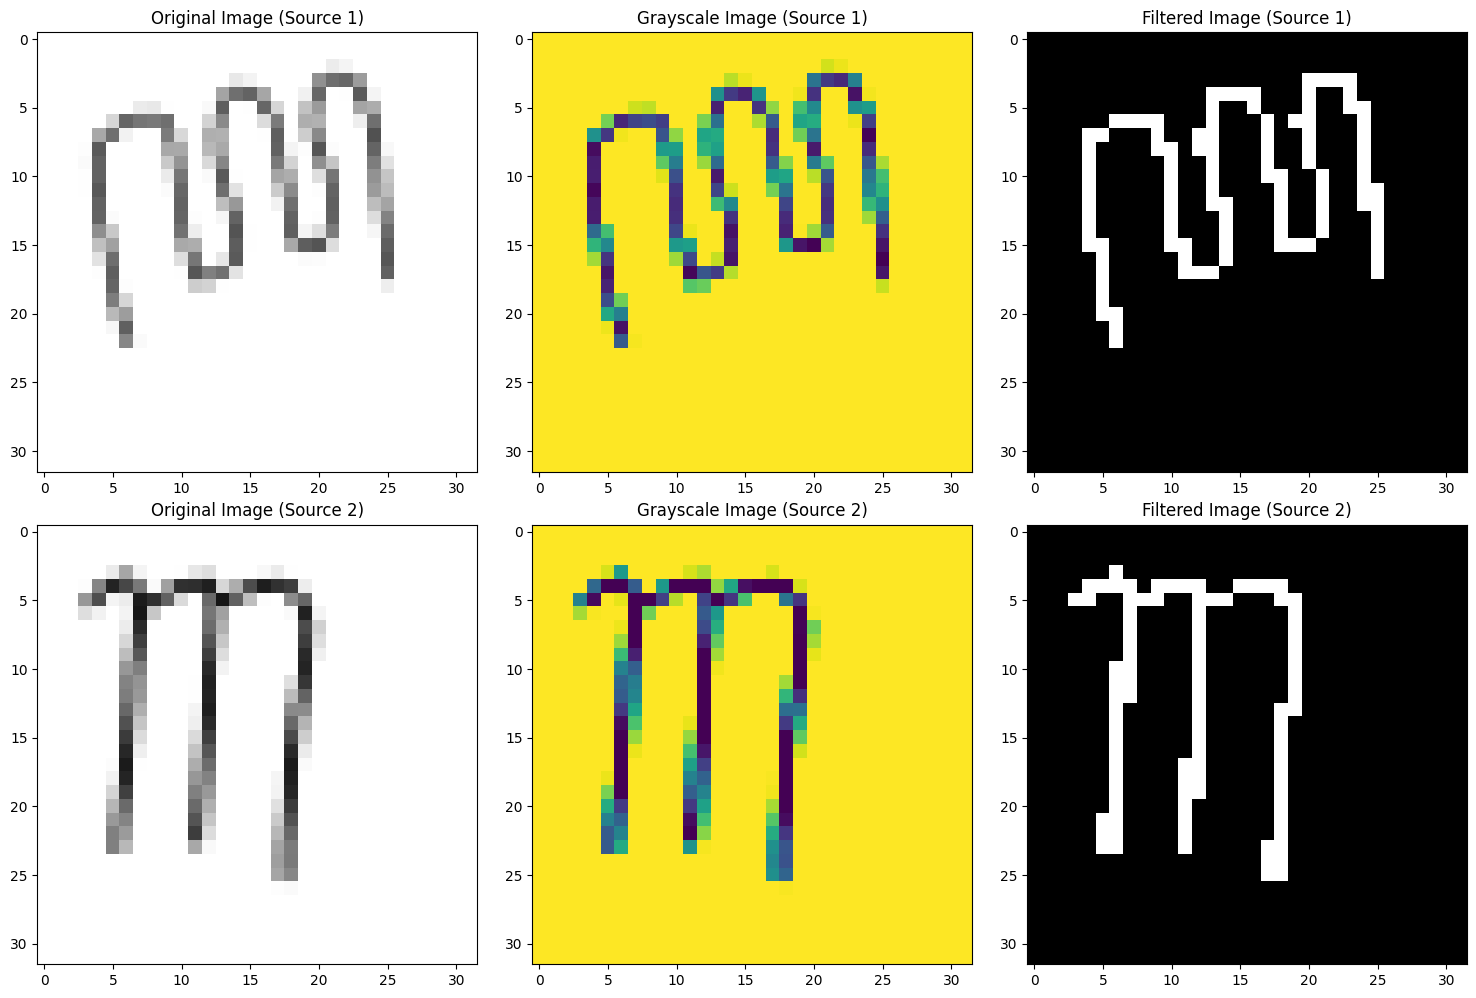

In [13]:
import matplotlib.pyplot as plt

# Select one image index to display
index_to_display = 599

# Display the original image, grayscale image, and filtered image from source 1
original_image_1 = X_original_1[index_to_display]
grayscale_image_1 = X_grayscale_1[index_to_display]
filtered_image_1 = X_filtered_1[index_to_display]

# Display the original image, grayscale image, and filtered image from source 2
original_image_2 = X_original_2[index_to_display]
grayscale_image_2 = X_grayscale_2[index_to_display]
filtered_image_2 = X_filtered_2[index_to_display]

# Plot the images
plt.figure(figsize=(15, 10))

# Plot images from source 1
plt.subplot(2, 3, 1)
plt.title('Original Image (Source 1)')
plt.imshow(original_image_1)
plt.axis('on')

plt.subplot(2, 3, 2)
plt.title('Grayscale Image (Source 1)')
plt.imshow(grayscale_image_1)
plt.axis('on')

plt.subplot(2, 3, 3)
plt.title('Filtered Image (Source 1)')
plt.imshow(filtered_image_1, cmap='gray')
plt.axis('on')

# Plot images from source 2
plt.subplot(2, 3, 4)
plt.title('Original Image (Source 2)')
plt.imshow(original_image_2)
plt.axis('on')

plt.subplot(2, 3, 5)
plt.title('Grayscale Image (Source 2)')
plt.imshow(grayscale_image_2)
plt.axis('on')

plt.subplot(2, 3, 6)
plt.title('Filtered Image (Source 2)')
plt.imshow(filtered_image_2, cmap='gray')
plt.axis('on')

plt.tight_layout()
plt.show()

In [14]:
# Print the shape of the input images from source 1
print(f"Bentuk input pada gambar dari sumber data 1 (Filtered): {X_filtered_1.shape}")

# Print the shape of the input images from source 2
print(f"Bentuk input pada gambar dari sumber data 2 (Filtered): {X_filtered_2.shape}")

Bentuk input pada gambar dari sumber data 1 (Filtered): (600, 32, 32)
Bentuk input pada gambar dari sumber data 2 (Filtered): (2634, 32, 32)


In [15]:
X_filtered_reshaped_1 = X_filtered_1.reshape(-1, 32, 32, 1)   # Reshape X_filtered from source 1
X_filtered_reshaped_2 = X_filtered_2.reshape(-1, 32, 32, 1)   # Reshape X_filtered from source 2

print("X_filtered shape after reshape (Source 1):", X_filtered_reshaped_1.shape)
print("X_filtered shape after reshape (Source 2):", X_filtered_reshaped_2.shape)

X_filtered shape after reshape (Source 1): (600, 32, 32, 1)
X_filtered shape after reshape (Source 2): (2634, 32, 32, 1)


In [16]:
# Use all data from source 1 for testing without splitting
X_val = X_filtered_reshaped_1
y_val = y_label_1

print("X_val shape", X_val.shape)
print("y_val shape", y_val.shape)

X_val shape (600, 32, 32, 1)
y_val shape (600, 20)


In [17]:
# Train test split 
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered_reshaped_2, y_label_2, test_size=0.2, random_state=37)

In [18]:
print("x_train shape", X_train.shape)
print("x_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (2107, 32, 32, 1)
x_test shape (527, 32, 32, 1)
y_train shape (2107, 20)
y_test shape (527, 20)


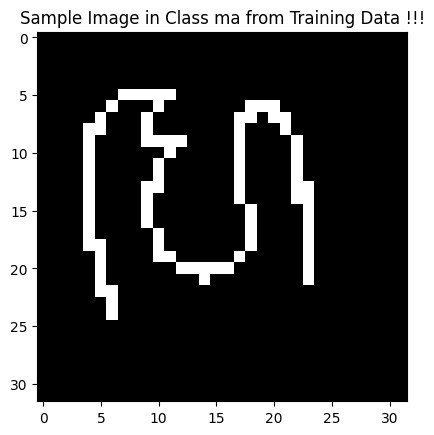

In [19]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

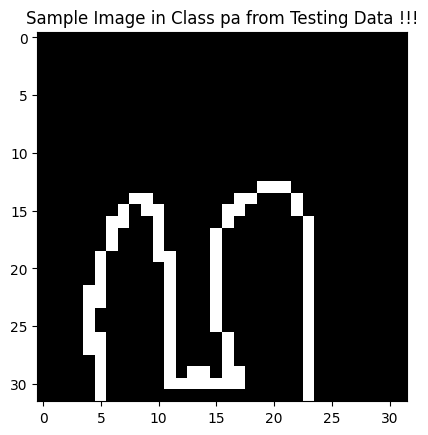

In [20]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[0], cmap='gray')
plt.title("Sample Image in Class {} from Testing Data !!!".format(AKSARA[np.argmax(y_test[0])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1 - 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def create_model(input_shape=INPUT_SHAPE, num_classes=20, learning_rate=0.001, dropout_rate=0.2, weight_decay=1e-3, clip_norm=0.5):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 3
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 4
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Flatten
    model.add(Flatten())

    # Dense layers
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Optimizer with weight decay and gradient clipping
    optimizer = Adam(learning_rate=learning_rate, clipnorm=clip_norm, decay=weight_decay)

    # Compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Set hyperparameters
learning_rate = 0.0001
dropout_rate = 0.2
weight_decay = 1e-2
clip_norm = 0.5

# Create the model
model = create_model(input_shape=INPUT_SHAPE, num_classes=20, learning_rate=learning_rate, dropout_rate=dropout_rate, weight_decay=weight_decay, clip_norm=clip_norm)

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,222,836 (31.37 MB)

 Trainable params: 8,215,540 (31.34 MB)

 Non-trainable params: 7,296 (28.50 KB)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Example of model fitting with batch size
hist_v1 = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[reduce_lr]
)

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 205s 4s/step - accuracy: 0.0607 - loss: 3.8864 - val_accuracy: 0.0500 - val_loss: 3.0168 - learning_rate: 1.0000e-04
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.0825 - loss: 3.7170 - val_accuracy: 0.0500 - val_loss: 3.1139 - learning_rate: 1.0000e-04
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - accuracy: 0.0969 - loss: 3.5431 - val_accuracy: 0.0500 - val_loss: 3.3661 - learning_rate: 1.0000e-04
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.1051 - loss: 3.4169 - val_accuracy: 0.0500 - val_loss: 3.7658 - learning_rate: 1.0000e-04
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.1489 - loss: 3.1294 - val_accuracy: 0.0500 - val_loss: 4.2156 - learning_rate: 1.0000e-04
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.1591 - loss: 2.9871 - val_accuracy: 0.0500 - val_loss: 5.0190 - learning_rate: 1.0000e-04
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.1907 

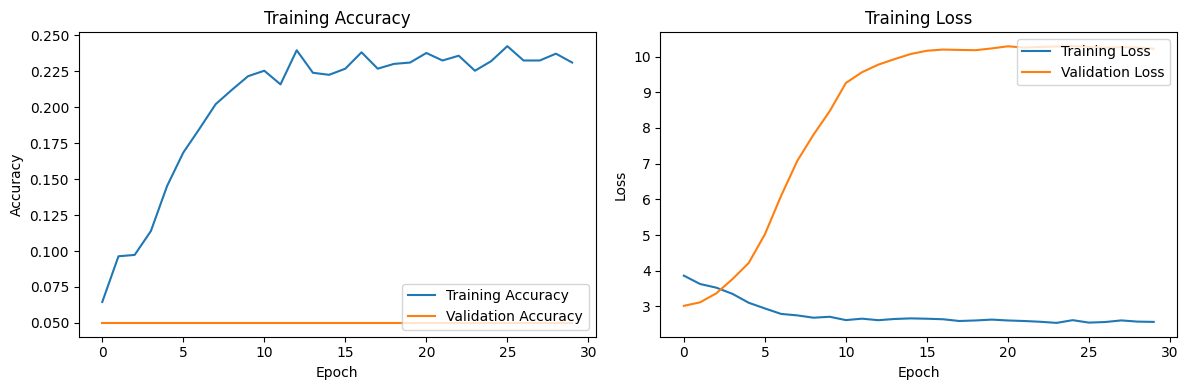

In [25]:
import matplotlib.pyplot as plt

# Memastikan bahwa hist_v1.history memiliki data yang diperlukan
acc = hist_v1.history.get('accuracy', [])
test_acc = hist_v1.history.get('val_accuracy', [])
loss = hist_v1.history.get('loss', [])
test_loss = hist_v1.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [26]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 466ms/step - accuracy: 0.0396 - loss: 6.4912
Test Loss: 6.517219066619873, Test Accuracy: 0.039848197251558304


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Tampilkan classification report yang lengkap
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 598ms/step
              precision    recall  f1-score   support

          ba       0.00      0.00      0.00        28
          ca       0.00      0.00      0.00        28
          da       0.00      0.00      0.00        26
         dha       0.00      0.00      0.00        36
          ga       0.00      0.00      0.00        24
          ha       0.00      0.00      0.00        24
          ja       0.00      0.00      0.00        27
          ka       0.00      0.00      0.00        20
          la       0.00      0.00      0.00        32
          ma       0.00      0.00      0.00        27
          na       0.00      0.00      0.00        30
         nga       0.00      0.00      0.00        17
         nya       0.00      0.00      0.00        28
          pa       0.00      0.00      0.00        23
          ra       0.07      1.00      0.14        21
          sa       0.00      0.00      0.00        24
          ta       0.00      0.00      

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

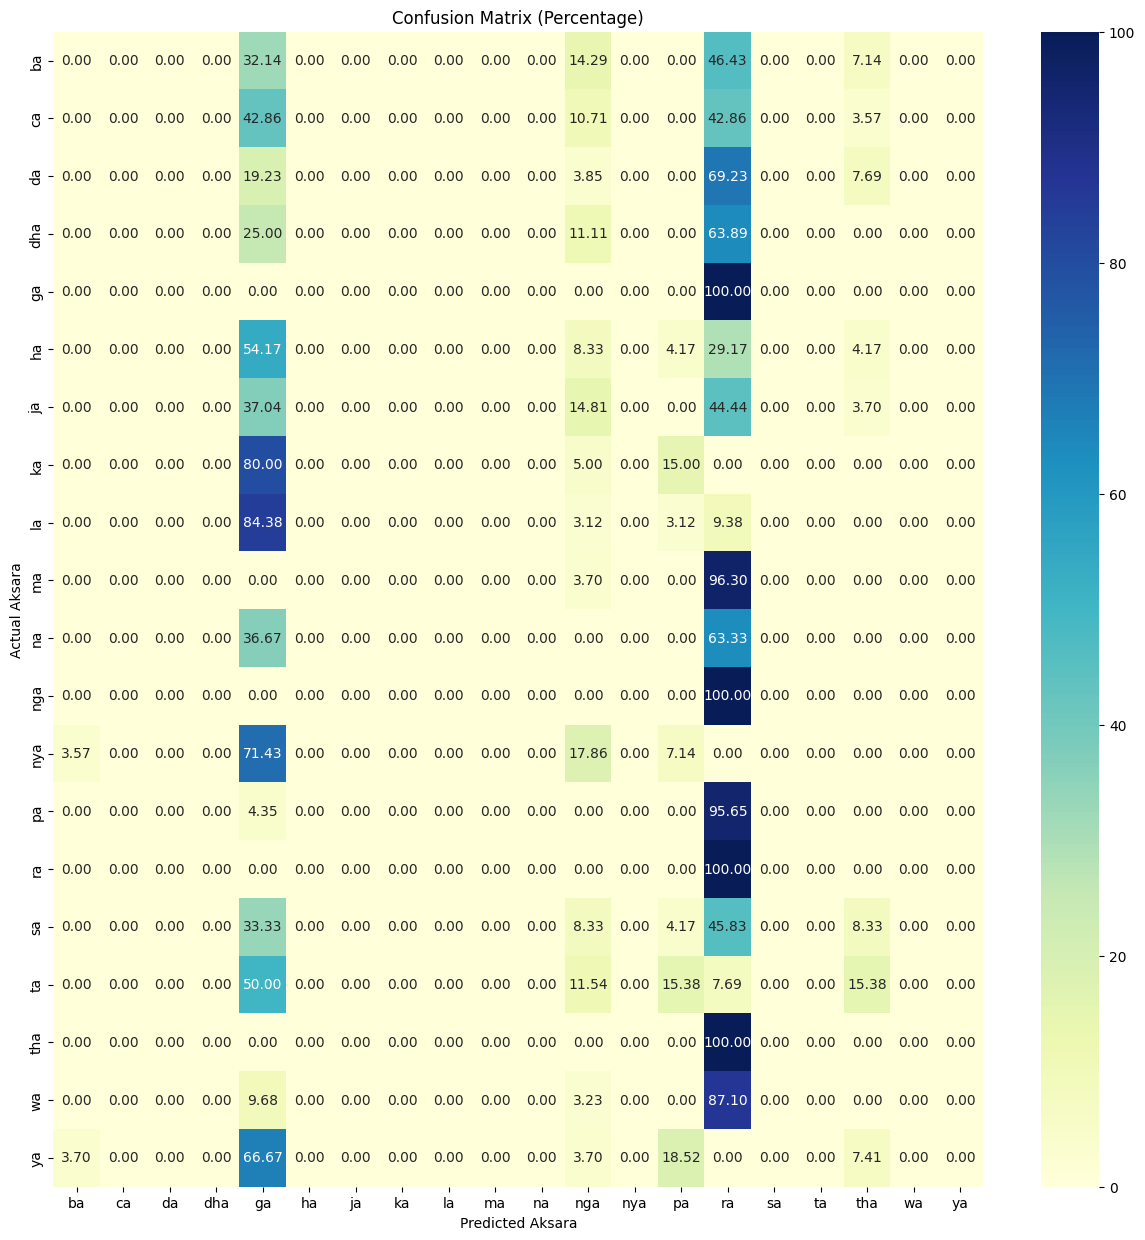

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(conf_matrix, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 2 - 

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def create_model(input_shape=INPUT_SHAPE, num_classes=20, learning_rate=0.0001, dropout_rate=0.3, weight_decay=1e-5, clip_norm=0.01):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 3
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 4
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Flatten
    model.add(Flatten())

    # Dense layers
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Optimizer with weight decay and gradient clipping
    optimizer = Adam(learning_rate=learning_rate, clipnorm=clip_norm, decay=weight_decay)

    # Compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Set hyperparameters
learning_rate = 0.0001
dropout_rate = 0.3
weight_decay = 1e-5
clip_norm = 0.01

# Create the model
model = create_model(input_shape=INPUT_SHAPE, num_classes=20, learning_rate=learning_rate, dropout_rate=dropout_rate, weight_decay=weight_decay, clip_norm=clip_norm)

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,618,612 (32.88 MB)

 Trainable params: 8,610,292 (32.85 MB)

 Non-trainable params: 8,320 (32.50 KB)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Example of model fitting with batch size
hist_v2 = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64
    # callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 321s 7s/step - accuracy: 0.0388 - loss: 4.2005 - val_accuracy: 0.0500 - val_loss: 3.0236
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 262s 7s/step - accuracy: 0.0499 - loss: 3.9980 - val_accuracy: 0.0500 - val_loss: 3.1328
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 276s 7s/step - accuracy: 0.0654 - loss: 3.9242 - val_accuracy: 0.0500 - val_loss: 3.3841
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 219s 5s/step - accuracy: 0.0872 - loss: 3.6751 - val_accuracy: 0.0500 - val_loss: 3.8302
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 246s 7s/step - accuracy: 0.1003 - loss: 3.6202 - val_accuracy: 0.0500 - val_loss: 4.5591
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 261s 7s/step - accuracy: 0.1017 - loss: 3.4977 - val_accuracy: 0.0500 - val_loss: 5.6274
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 336s 9s/step - accuracy: 0.1155 - loss: 3.4281 - val_accuracy: 0.0500 - val_loss: 7.2672
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 196s 5s/step - accuracy: 0.1359 - loss: 3.2348 - val_accuracy: 0.

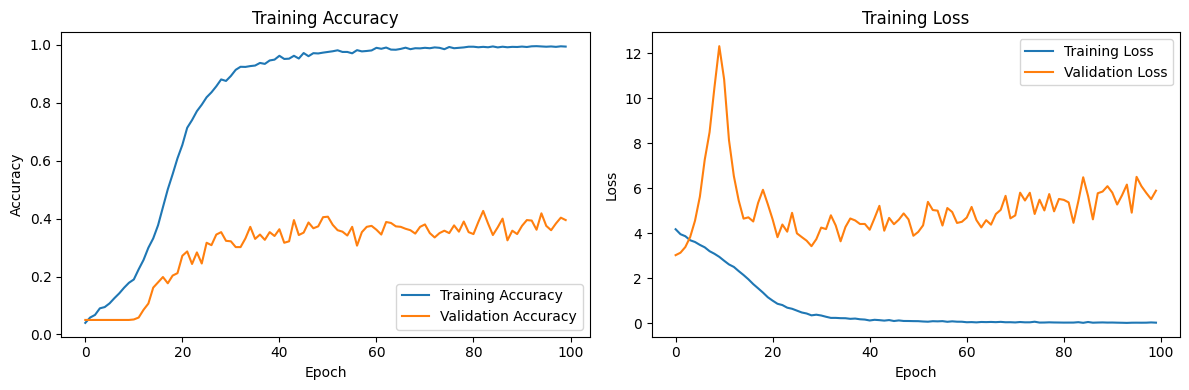

In [36]:
import matplotlib.pyplot as plt

# Memastikan bahwa hist_v2.history memiliki data yang diperlukan
acc = hist_v2.history.get('accuracy', [])
test_acc = hist_v2.history.get('val_accuracy', [])
loss = hist_v2.history.get('loss', [])
test_loss = hist_v2.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [37]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 345ms/step - accuracy: 0.9942 - loss: 0.0293
Test Loss: 0.06805982440710068, Test Accuracy: 0.992409884929657


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Tampilkan classification report yang lengkap
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step
              precision    recall  f1-score   support

          ba       0.96      0.96      0.96        28
          ca       1.00      1.00      1.00        28
          da       1.00      1.00      1.00        26
         dha       1.00      0.97      0.99        36
          ga       1.00      1.00      1.00        24
          ha       0.96      1.00      0.98        24
          ja       1.00      1.00      1.00        27
          ka       1.00      1.00      1.00        20
          la       1.00      1.00      1.00        32
          ma       1.00      1.00      1.00        27
          na       1.00      1.00      1.00        30
         nga       0.94      1.00      0.97        17
         nya       1.00      0.96      0.98        28
          pa       1.00      1.00      1.00        23
          ra       1.00      1.00      1.00        21
          sa       1.00      1.00      1.00        24
          ta       1.00      1.00      1

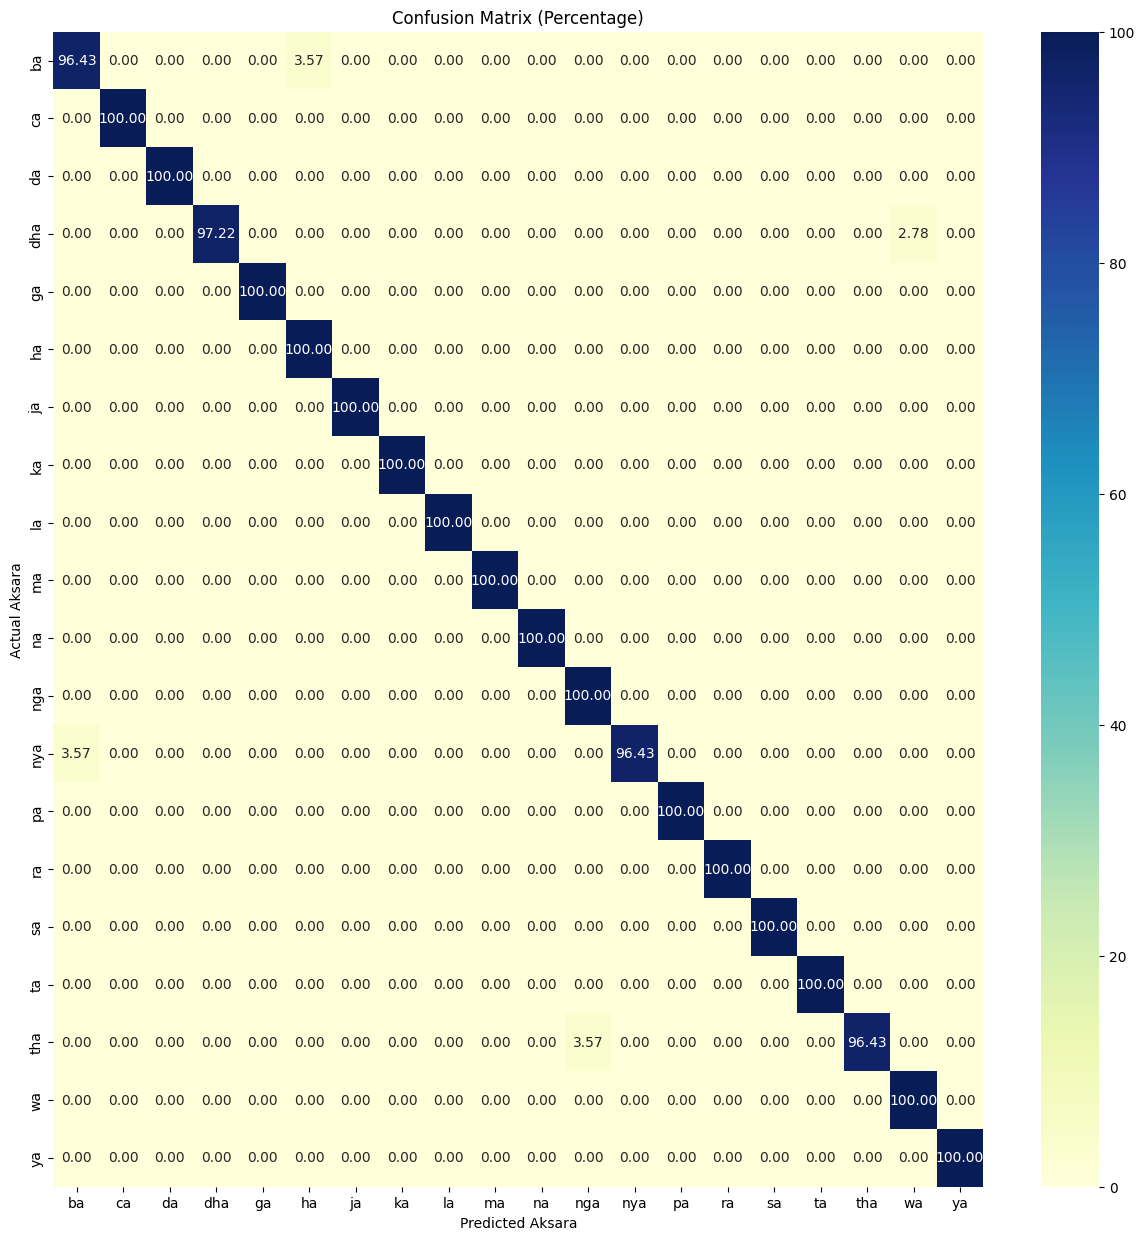

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(conf_matrix, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()